In [19]:
import matplotlib.pyplot as plt
import matplotlib
import math as math
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats

In [20]:
def invFx1(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [21]:
def invFx2(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [22]:
def invFyxx2(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) + 1 - 2 * u
    else:
        b = random * (2 - 2 * u ) -1 + 2* u
    return b

In [23]:
def invFyxx1(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) 
    else:
        b = random * (2 - 2 * u)
    return b

In [24]:
def makePoint(coin, random):
    if coin > 0.5:
        return (tB, '')

In [26]:
def makeSample(c):
    if c > 0.5:
        x = invFx1(np.random.uniform(0,1,1))
        y = invFyxx1(x)
        clas = 0
    else:
        x = invFx2(np.random.uniform(0,1,1))
        y = invFyxx2(x)
        clas = 1
    return (x,y, clas)

In [28]:
def inRectangle(x,y, rx,ry, w,d):
    return x >= rx and rx + w > x and y >= ry and ry + h > y

In [110]:
#generar puntos de train y test
train_points = map(makeSample, np.random.uniform(0,1,1000))
test_points = map(makeSample, np.random.uniform(0,1,300))

xtr,ytr,ctr = zip(*train_points)
arr = np.array(list(zip(xtr,ytr,ctr)))
train_data = pd.DataFrame(data=arr,columns=['x','y','class'])
xte,yte,cte = zip(*test_points)
arrte = np.array(list(zip(xte,yte,cte)))
test_data = pd.DataFrame(data=arrte,columns=['x','y','class'])

In [115]:
def getSection_s1(x,y):
    #para esquema 1
    #__________
    #|0        |
    #|_________|
    #|1        |
    #|_________|
    if y > 0.5:
        return 0
    return 1

In [149]:
    #Analisis para esquema 1
    #__________
    #|         |
    #|_________|
    #|         |
    #|_________|
train_data_s1 = train_data
# se determina a que seccion del plano pertenece el punto
train_data_s1['section'] = train_data_s1.apply(lambda row: getSection_s1(row['x'], row['y']), axis=1)
# se cuentan la cantidad de puntos para cada seccion del plano de acuerdo a la clase de los puntos
section_results_s1 = train_data_s1.groupby(['section', 'class']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:3]
# se determina un clasificador según la cantidad maxima de puntos de una determinada clase
classifier_s1 = section_results_s1.loc[section_results_s1.groupby('section')['count'].idxmax()].reset_index().iloc[:,1:4]

#def getClassification(section, classifier):
#    return classifier_s1.transpose().iloc[section][1]

test_data_s1 = test_data
# se identifica a que seccion del plano pertenece el punto
test_data_s1['section'] = test_data_s1.apply(lambda row: getSection_s1(row['x'], row['y']), axis=1)
# se clasifica el punto de acuerdo al clasificador elegido
test_data_s1['classification'] = test_data_s1.apply(lambda row, c=classifier_s1.transpose(): c.iloc[int(row['section'])][1], axis=1)
# se evalua si la clasificacion del punto fue exitosa
test_data_s1['result'] = test_data_s1.apply(lambda row: int(row['class'])==int(row['classification']), axis=1)
final_result_s1 = test_data_s1.groupby(['result']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:2]

In [152]:
# en el clasificador se indica para cada seccion la clase dominante y la cantidad total de puntos de esa clase en el set
#de entrenamiento
classifier_s1

,section,class,count
0,0,1.0,392
1,1,0.0,370


In [147]:
test_data_s1.sample(2)
# x: coordenada en x
# y: coordenada en y
# class: clase original a la que pertenece el punto
# section: seccion en el plano segun esquema a la que pertenece el punto
# classification: clasificacion de la clase realizada segun el clasificador elegido
# result: indica si el resultado fue exitoso o fallido para la clasificacion propuesta

,x,y,class,section,classification,result
40,0.624462,0.647426,0.0,0,1.0,False
298,0.571007,0.923760,1.0,0,1.0,True


In [150]:
# resultados finales para el clasificador del esquema 1
final_result_s1

,result,count
0,False,66
1,True,234


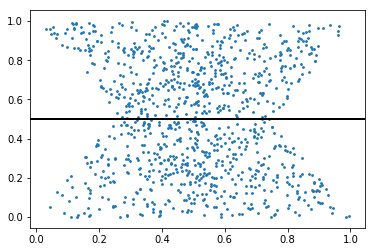

In [151]:
%matplotlib inline

plt.scatter(xtr,ytr,s=3.14)
# draw the grid
plt.axhline(0.5, lw=2, color='k', zorder=5)
    
plt.show()